In [83]:
import pandas as pd
import re 
import matplotlib.pyplot as plt

In [50]:
dataCsv = pd.read_csv("data.csv", index_col=0)

In [51]:
dataCsv.head()

,Publication number,Category,Publication number.1,Category.1,Publication number.2,Category.2,Publication number.3,Category.3
0,US9040302B2,Non-Alcohol,US9012694B2,Alcohol,US9277674B2,Non-Autonomous Vehicles,US9646356B1,Autonomous Vehicles
1,US9040109B2,Non-Alcohol,US9012188B2,Alcohol,US9277385B2,Non-Autonomous Vehicles,US9645576B2,Autonomous Vehicles
2,US9040107B2,Non-Alcohol,US9010952B2,Alcohol,US9277311B2,Non-Autonomous Vehicles,US9622452B2,Autonomous Vehicles
3,US9040036B2,Non-Alcohol,US8987530B2,Alcohol,US9277191B2,Non-Autonomous Vehicles,US9599482B2,Autonomous Vehicles
4,US9038991B2,Non-Alcohol,US8981165B2,Alcohol,US9276431B2,Non-Autonomous Vehicles,US9598078B2,Autonomous Vehicles


In [47]:
dataCsv.iloc[:,[1,3,5,7]]=["Non-Alcohol","Alcohol", "Non-Autonomous Vehicles","Autonomous Vehicles"]

In [39]:

# remove unnammed columns
dataCsv = dataCsv.loc[:, ~dataCsv.columns.str.contains('^Unnamed')]
"""
new_header = dataCsv.iloc[0] #grab the first row for the header
dataCsv = dataCsv[1:] #take the data less the header row
dataCsv.columns = new_header
"""


'\nnew_header = dataCsv.iloc[0] #grab the first row for the header\ndataCsv = dataCsv[1:] #take the data less the header row\ndataCsv.columns = new_header\n'

In [53]:
dataCsv.tail()

,Publication number,Category,Publication number.1,Category.1,Publication number.2,Category.2,Publication number.3,Category.3
295,WO2015032008A1,Non-Alcohol,US20160176589A1,Alcohol,CN103354991B,Non-Autonomous Vehicles,CN103281742B,Autonomous Vehicles
296,WO2015031940A1,Non-Alcohol,US20160175783A1,Alcohol,US9257926B2,Non-Autonomous Vehicles,CN102806912B,Autonomous Vehicles
297,WO2015003995A3,Non-Alcohol,US20160175782A1,Alcohol,US9257918B2,Non-Autonomous Vehicles,CN206091477U,Autonomous Vehicles
298,WO2014201037A3,Non-Alcohol,US20160175781A1,Alcohol,US9257867B2,Non-Autonomous Vehicles,EP2544928B1,Autonomous Vehicles
299,WO2015031637A1,Non-Alcohol,US20160145551A1,Alcohol,US9257832B2,Non-Autonomous Vehicles,EP2758295B1,Autonomous Vehicles


In [49]:
dataCsv.to_csv("data.csv")

###############################
############  EDA  ############
###############################

In [77]:

# Function to extract all the numbers from the given string 
def getNumber(str): 
    array = re.findall(r'[0-9]+', str) 
    return int(array[0]) 
  
# Driver code 
str = "adbv345hj43hvb42"
array = getNumber(str) 
print(array) 
centerintData = dataCsv.copy()
for i in [0,2,4,6]:
    centerintData.iloc[:,i] = dataCsv.iloc[:,i].apply(lambda x : getNumber(x))



345


In [78]:
centerintData.dtypes


Publication number       int64
Category                object
Publication number.1     int64
Category.1              object
Publication number.2     int64
Category.2              object
Publication number.3     int64
Category.3              object
dtype: object

In [79]:
centerintData.head()

,Publication number,Category,Publication number.1,Category.1,Publication number.2,Category.2,Publication number.3,Category.3
0,9040302,Non-Alcohol,9012694,Alcohol,9277674,Non-Autonomous Vehicles,9646356,Autonomous Vehicles
1,9040109,Non-Alcohol,9012188,Alcohol,9277385,Non-Autonomous Vehicles,9645576,Autonomous Vehicles
2,9040107,Non-Alcohol,9010952,Alcohol,9277311,Non-Autonomous Vehicles,9622452,Autonomous Vehicles
3,9040036,Non-Alcohol,8987530,Alcohol,9277191,Non-Autonomous Vehicles,9599482,Autonomous Vehicles
4,9038991,Non-Alcohol,8981165,Alcohol,9276431,Non-Autonomous Vehicles,9598078,Autonomous Vehicles


In [80]:
centerintData.describe()

,Publication number,Publication number.1,Publication number.2,Publication number.3
count,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02
mean,4.516569e+09,9.533417e+09,5.257887e+08,5.287028e+09
std,7.873167e+09,9.973553e+09,8.625534e+08,8.625964e+09
min,1.432321e+06,2.783900e+04,1.421460e+06,2.436620e+06
25%,2.859976e+06,9.666260e+06,2.827759e+06,9.534319e+06
50%,9.012510e+06,2.015034e+09,9.273610e+06,1.066921e+08
75%,2.015063e+09,2.017011e+10,5.823487e+08,6.552852e+09
max,2.015015e+10,2.018015e+10,2.016023e+09,2.017015e+10


Text(0.5, 1.0, 'Side-by-Side Histogram with Multiple Airlines')

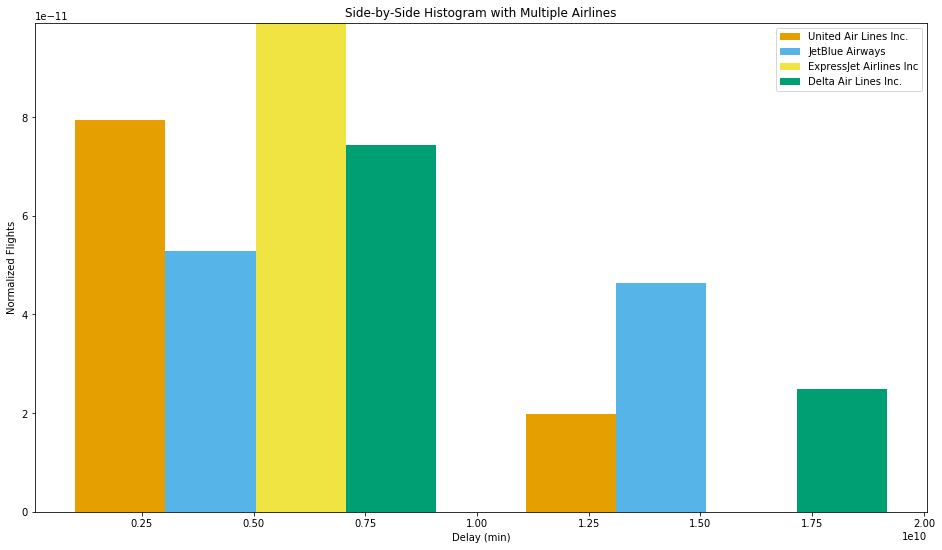

In [133]:
# Make a separate list for each airline
x1 = list(centerintData.iloc[:,0])
x2 = list(centerintData.iloc[:,2])
x3 = list(centerintData.iloc[:,4])
x4 = list(centerintData.iloc[:,6])
# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73']
names = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc',
         'Delta Air Lines Inc.']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.rcParams["figure.figsize"] = [16,9]
plt.hist([x1, x2, x3, x4], bins = 2, density=True,
         color = colors, label=names)

# Plot formatting

plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Multiple Airlines')

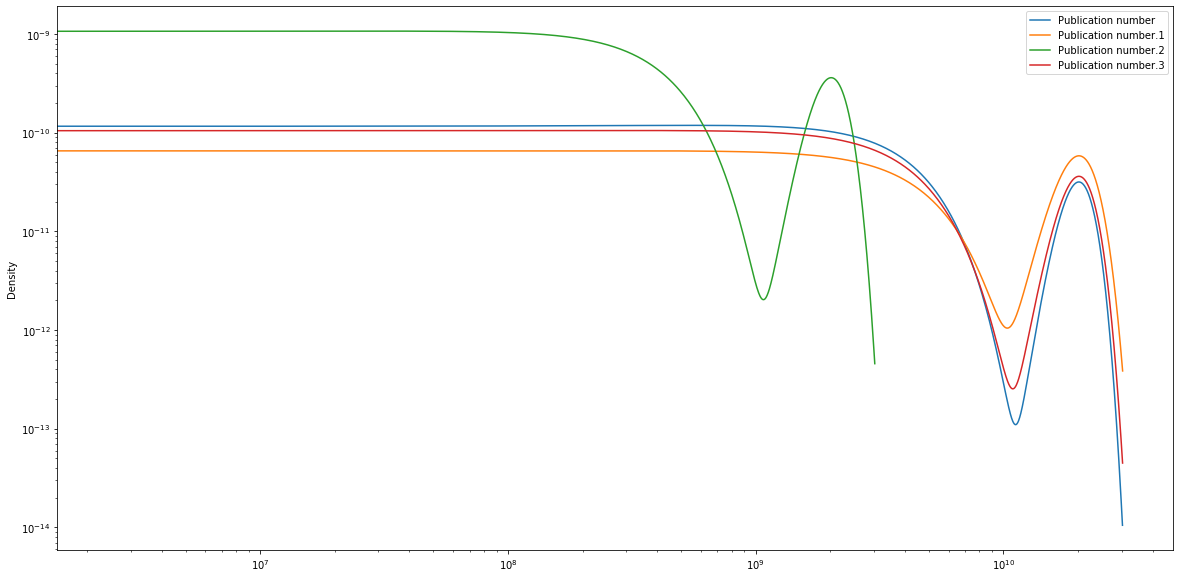

In [135]:
import fastai


centerintData.plot(kind = "density",figsize = (20,10),logx = True,logy = True)